# Raport 2
## Generowanie procesów losowych
### Marcelina Białek(268871), Jakub Franczak()

# Spis treści
1. Zadanie 1 - Szum telegraficzny
2. Zadanie 2 - Efektywność generacji niejednorodonego procesu Poissona
3. Zadanie 3 - Estymacja niejednorodnej intensywności
4. Zadanie 4 - Prawdopodobieństwo ruiny
5. Zadanie 5 - Rozkład stacjonarny łańcucha Markowa
6. Zadanie 6 - Czas wyjścia

# **Zadanie 1 - Szum telegraficzny**

#### $\textbf{DEFINICJA}$
Szum telegraficzny zdefiniowany jest za pomocą równania:\
$Xt:= D(−1)^{N_t}$, gdzie:
- $N_t$ - proces Poissona 
- D - losowe, niezależne od N, $P(D = 1) = \frac{1}{2} = P(D = −1)$. Oznacza to, że D przyjmuje wartości ze zbioru $\{-1, 1\}$. Obie te wartości przyjmuje z prawdopodobieństwem $\frac{1}{2},$ co oznacza, że obie te wartosci sa równie prawdopodobne.
### Zaimportowanie potrzebnych bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Zdefiniowanie szumu telegraficznego i wyświetlenie jego 10 początkowych stanów

In [2]:
liczba_krokow = 500
T = 1000

def czestosc(t):
    return 2* (1 + np.sin(2 * t/T))

def generuj_szum(T):
    dt = []
    ts = []
    t = 0
    while t < T:
        r = np.random.exponential(1/czestosc(t))
        t += r
        dt.append(r)
        ts.append(t)
    D = np.random.choice([1, -1], len(ts), p=[0.5, 0.5])
    Xt = D * ((-1) ** np.arange(len(ts)))
    return np.array(ts), Xt

ts, Xt = generuj_szum(T)

print("10 pierwszych wartości szumu telegraficznego:", Xt[:10])

10 pierwszych wartości szumu telegraficznego: [-1 -1 -1  1 -1 -1 -1 -1  1 -1]


Funkcja 'czestosc(t)' zwraca wartość, która waha się od 2 do -2, jest to funkcja sinusoidalna.
Funkcja 'generuj_szum(T)' zwraca dwie listy: 'ts' zawierającą czasy przejść oraz 'Xt' zawierającą odpowiadające im wartości sygnału.
### Wizualizacja wyników
#### Trajektoria szumu telegraficznego

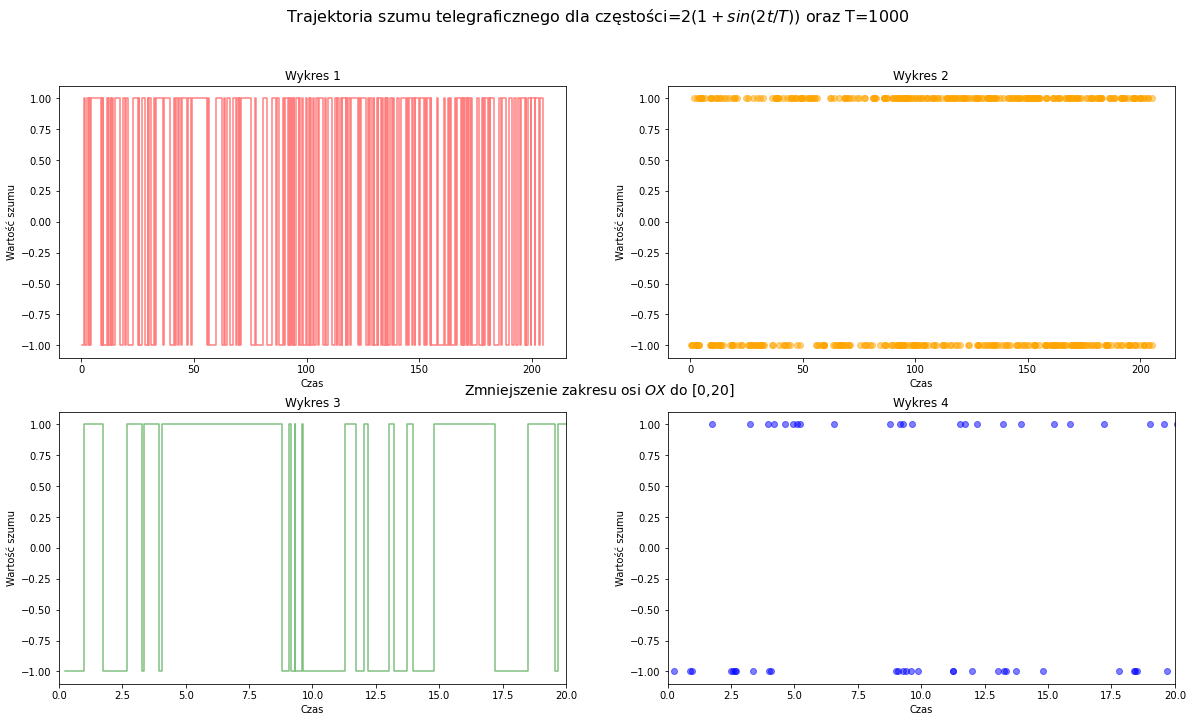

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(20, 11))

axs[0,0].step(ts[:liczba_krokow], Xt[:liczba_krokow], color='red', alpha=0.5)
axs[0,0].set_ylim(-1.1,1.1)
axs[0,0].set_xlabel('Czas')
axs[0,0].set_ylabel('Wartość szumu')
axs[0,0].set_title('Wykres 1')


axs[0,1].scatter(ts[:liczba_krokow], Xt[:liczba_krokow], color='orange', alpha=0.5)
axs[0,1].set_ylim(-1.1,1.1)
axs[0,1].set_xlabel('Czas')
axs[0,1].set_ylabel('Wartość szumu')
axs[0,1].set_title('Wykres 2')

axs[1,0].step(ts[:liczba_krokow], Xt[:liczba_krokow], color='green', alpha=0.5)
axs[1,0].set_ylim(-1.1,1.1)
axs[1,0].set_xlim(0,20)
axs[1,0].set_xlabel('Czas')
axs[1,0].set_ylabel('Wartość szumu')
axs[1,0].set_title('Wykres 3')

axs[1,1].scatter(ts[:liczba_krokow], Xt[:liczba_krokow], color='blue', alpha=0.5)
axs[1,1].set_ylim(-1.1,1.1)
axs[1,1].set_xlabel('Czas')
axs[1,1].set_xlim(0,20)
axs[1,1].set_ylabel('Wartość szumu')
axs[1,1].set_title('Wykres 4')
fig.suptitle('Trajektoria szumu telegraficznego dla częstości=$2(1+sin(2t/T))$ oraz T=1000 ', fontsize=16)
# Dodaj wspólny tytuł dla dolnych wykresów
fig.text(0.5, 0.49, 'Zmniejszenie zakresu osi $OX$ do [0,20]', ha='center', fontsize=14)

plt.show()


Wszystkie z czterech wykresów pokazują tą samą trajektorię szumu telegraficznego. Wykresy na górze (1 i 2) pokazują trajektorię dla całego zakresu czasu, a wykresy na dole (3 i 4) dla skróconego zakresu osi $OX ([0,10])$, w celu dokładniejszej obserwacji zachowania trajektorii. Wykresy po lewej stronie (1 i 3) pokazują ciągły wykres trajektorii, a wykresy po prawej stronie (2 i 4) wykres punktowy.   
#### Funkcja średniej $m_t=E[x_t]$

In [4]:
liczba_realizacji=1000
X = np.zeros((liczba_realizacji, liczba_krokow))

# Generowanie realizacji procesu
for i in range(liczba_realizacji):
    ts, Xt = generuj_szum(T)
    X[i, :] = np.interp(np.linspace(0, T, liczba_krokow), ts, Xt)

# Obliczanie średniej
mt = np.mean(X, axis=0)



Kod zwraca wektor 'mt', który zawiera średnią wartość sygnału w każdym kroku czasu.
### Wizualizacja wyników

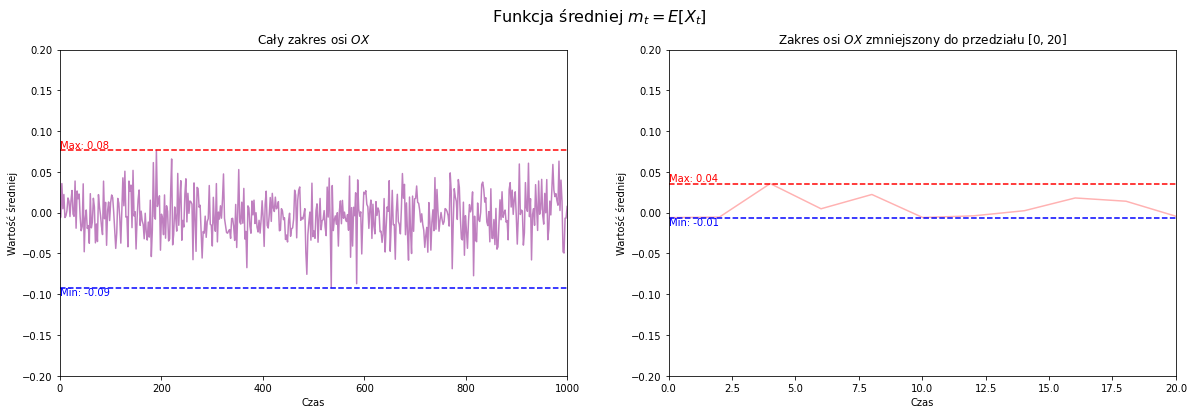

In [5]:


fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].plot(np.linspace(0, T, liczba_krokow), mt, color='purple', alpha=0.5)
axs[0].set_xlabel('Czas')
axs[0].set_ylabel('Wartość średniej')
axs[0].set_title('Cały zakres osi $OX$')
axs[0].set_xlim(0,1000)
axs[0].set_ylim(-0.2,0.2, 100)


maksimum = np.max(mt) #przerywane linie
minimum = np.min(mt)
axs[0].axhline(maksimum, color='red', linestyle='--')
axs[0].axhline(minimum, color='blue', linestyle='--')
axs[0].text(0, maksimum, f'Max: {maksimum:.2f}', color='red', ha='left', va='bottom')
axs[0].text(0, minimum, f'Min: {minimum:.2f}', color='blue', ha='left', va='top')


axs[1].plot(np.linspace(0, T, liczba_krokow), mt, color='red', alpha=0.3)
axs[1].set_xlabel('Czas')
axs[1].set_ylabel('Wartość średniej')
axs[1].set_title('Zakres osi $OX$ zmniejszony do przedziału $[0,20]$')
axs[1].set_xlim(0,20)
axs[1].set_ylim(-0.2,0.2, 100)
fig.suptitle('Funkcja średniej $m_t=E[X_t]$', fontsize=16)

minimum_20 = np.min(mt[np.where(np.linspace(0, T, liczba_krokow) <= 20)]) #przerywane linie
maksimum_20 = np.max(mt[np.where(np.linspace(0, T, liczba_krokow) <= 20)])
axs[1].axhline(maksimum_20, color='red', linestyle='--')
axs[1].axhline(minimum_20, color='blue', linestyle='--')
axs[1].text(0, maksimum_20, f'Max: {maksimum_20:.2f}', color='red', ha='left', va='bottom')
axs[1].text(0, minimum_20, f'Min: {minimum_20:.2f}', color='blue', ha='left', va='top')
plt.show()

#### Funkcja kowariancji $r_t=cov(X_0, X_t)$

In [6]:
# Obliczanie kowariancji
rt = np.array([np.cov(X[:, 0], X[:, i])[0, 1] for i in range(liczba_krokow)])

Kod zwraca wektor 'rt', który zawiera wartość kowariancji dla każdego kroku czasu ze wszystkich realizacji szumu telegraficznego.
### Wizualizacja wyników

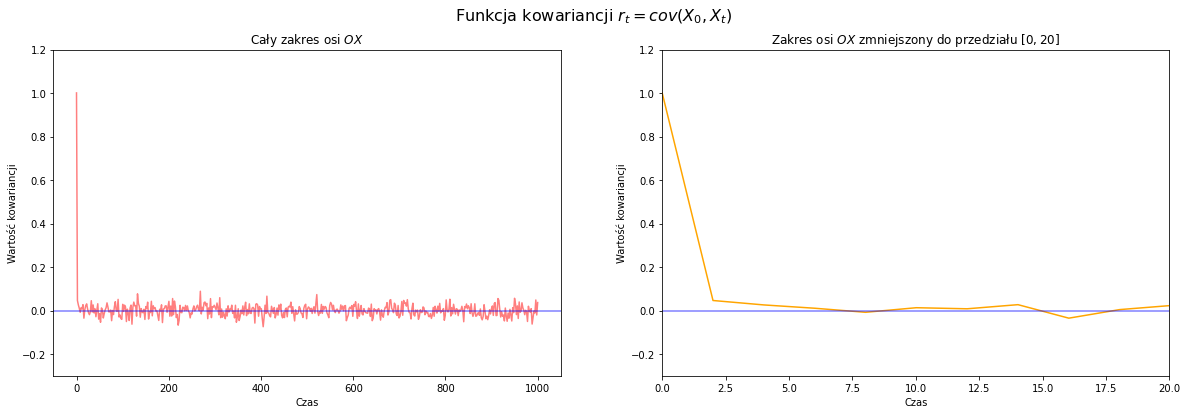

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].plot(np.linspace(0, T, liczba_krokow), rt, color='red', alpha=0.5)
axs[0].set_xlabel('Czas')
axs[0].set_ylabel('Wartość kowariancji')
axs[0].set_title('Cały zakres osi $OX$')
axs[0].axhline(y=0, color='blue', alpha=0.5)
axs[0].set_ylim(-0.3,1.2, 100)



axs[1].plot(np.linspace(0, T, liczba_krokow), rt, color='orange', alpha=1)
axs[1].set_xlabel('Czas')
axs[1].set_ylabel('Wartość kowariancji')
axs[1].set_title('Zakres osi $OX$ zmniejszony do przedziału $[0,20]$')
axs[1].set_xlim(0,20, 20)
axs[1].axhline(y=0, color='blue', alpha=0.5)
axs[1].set_ylim(-0.3,1.2, 100)
fig.suptitle('Funkcja kowariancji $r_t=cov(X_0, X_t)$', fontsize=16)
plt.show()

Jak widzimy, kowariancja zanika niemalże błyskawicznie. Dla czasu 0 wynosi ona 1, a dla czasu $2.5$ osiąga już wartość bliską 0. Od tego momentu, przez cały czas trwania oscyluje wokół 0, zarówno po dodatniej, jak i ujemnej jego stronie, co możemy dokładnie zaobserwować dzięki czerowej linii, która jest funkcją stałą $y=0$.

# **Zadanie 2 - Efektywność generacji niejednorodonego procesu Poissona**
### Zaimportowanie potrzebnych bibliotek

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time


## $\textbf{METODA PRZERZEDZANIA}$
#### Zdefiniowanie wolnozmiennej, szybkozmiennej funkcji intensywności oraz $\lambda$ takiej, że $\forall_{t \in \mathbb{R}}  \space \lambda(t) \leq \lambda$
Na początku chcieliśmy zaznaczyć, że w matematyce nie istnieje termin 'funkcja średniozmienna'. Używamy tego terminu, aby w jak najprostszy sposób oznaczyć funkcję, która zmienia się w czasie szybciej, niż funkcja wolnozmienna, ale wolniej niz funkcja szybkozmienna

In [9]:
np.random.seed(0) # ustawienie ziarna 
T = 100
def lambda_t_wolno(t):
    return np.sqrt(t)+1

def lambda_t_srednio(t):
    return 2*t+1

def lambda_t_szybko(t):
    return t**2+1


In [10]:
def przerzedzanie(lambda_t, T):
    
    lambda_max = max([lambda_t(t) for t in np.linspace(0, T, 1000)])
    t = 0
    I = 0
    suma_prob = 0
    S = []
    while True:
        U1 = np.random.uniform(0, 1)
        t = t - (1/lambda_max) * np.log(U1)
        if t > T:
            break
        suma_prob += 1
        U2 = np.random.uniform(0, 1)
        if U2 <= lambda_t(t) / lambda_max:
            I = I + 1
            S.append(t)
            
    return np.array(S), I / t, I/suma_prob

W funkcji:
1. Obliczamy maksymalną wartość intensywności 'lambda_max' dla 1000 punktów.
2. Generujemy zdarzenia o stałej intensywności 'lambda_max'. Zdarzenia te są generowane z użyciem rozkładu jednostajnego i transformacji wykładniczej.
3. Każde wygenerowane zdarzenie jest przerzedzane z prawdopodobieństwem lambda_t(t) / lambda_max.

Funkcja zwraca trzy wartości:
- S: tablica zawierająca czasy akceptowanych zdarzeń.
- $\frac{I}{t}$: średnia liczba zdarzeń na jednostkę czasu.
- $\frac{I}{\text{suma prób}}$: stosunek przyjmowanych zdarzeń do wszystkich zdarzeń
## $\textbf{METODA ODWROTNEJ DYSTRYBUNTY}$

In [11]:
def funkc_odwr_wolno(y, t):
    return -np.log(1-y)/(np.sqrt(t)+1)

def funkc_odwr_srednio(y, t):
    return -np.log(1-y)/(10*t+1)

def funkc_odwr_szybko(y, t):
    return -np.log(1-y)/(t**2+1)

def odwrotna_dystrybuanta(T, func_odwr):
    czasy = []
    t = 0
    while True:
        U = np.random.uniform(0,1)
        t = t + func_odwr(U, t)
        if T < t:
            break
        czasy.append(t)
    return czasy



W funkcji:
1. Generujemy pseudolosową liczbę U z rozkładu jednostajnego na przedziale [0, 1].
2. Dodajemy do aktualnego czasu t wartość odwrotnej dystrybuanty w punkcie U obliczoną za pomocą funkcji 'func_odwr(U, t)'.
3. Powtarzamy powyższe kroki, dopóki nie przekroczmy czasu końcowego T.
Funkcja zwraca listę 'czasy' zawierającą czasy zdarzeń.

#### Sprawdzenie efektywności oraz szybkości
#### Czas
##### PORÓWNANIE CZASÓW GENEROWANIA DWIEMA METODAMI DLA RÓŻNYCH WARTOŚCI PARAMETRU T

In [12]:
czas_wolno_przerz, czas_srednio_przerz, czas_szybko_przerz = [], [], []
czas_wolno_odwr, czas_srednio_odwr, czas_szybko_odwr = [], [], []
T_values = [10, 50, 80, 100]

for T in T_values:

    # metoda przerzedzenia
    start = time.perf_counter()
    S_wolno, efekt_wolno, stos_akceptacji_wolno = przerzedzanie(lambda_t_wolno, T)   
    end = time.perf_counter()
    czas_wolno_przerz.append(end - start)

    start = time.perf_counter()
    S_srednio, efekt_srednio, stos_akceptacji_srednio = przerzedzanie(lambda_t_srednio, T)
    end = time.perf_counter()
    czas_srednio_przerz.append(end - start)

    start = time.perf_counter()
    S_szybko, efekt_szybko, stos_akceptacji_szybko = przerzedzanie(lambda_t_szybko, T)
    end = time.perf_counter()
    czas_szybko_przerz.append(end - start)

    # metoda odwrotnej dystrybuanty
    start = time.perf_counter()
    wolno_odwr=odwrotna_dystrybuanta(T, funkc_odwr_wolno)
    end = time.perf_counter()
    czas_wolno_odwr.append(end - start)

    start = time.perf_counter()
    srednio_odwr=odwrotna_dystrybuanta(T, funkc_odwr_srednio)
    end = time.perf_counter()
    czas_srednio_odwr.append(end - start)

    start = time.perf_counter()
    szybko_odwr=odwrotna_dystrybuanta(T, funkc_odwr_szybko)
    end = time.perf_counter()
    czas_szybko_odwr.append(end - start)


Funkcja zwraca sześć list:
- 'czas_wolno_przerz'
- 'czas_srednio_przerz' 
- 'czas_szybko_przerz'
- 'czas_wolno_odwr'
- 'czas_srednio_odwr'
- 'czas_szybko_odwr',\
które zawierają czasy wykonania symulacji dla różnych wartości T i dla różnych intensywności procesu, dla każdej z dwóch metod.
#### WYŚWIETLENIE WYNIKÓW

In [13]:
print("Czasy dla metody przerzedzenia:")
for T, c_w, c_s, c_sz in zip(T_values, czas_wolno_przerz, czas_srednio_przerz, czas_szybko_przerz):
    print(f"T: {T}, czas dla funkcji wolnozmiennej: {c_w}, średniozmiennej: {c_s}, szybkozmiennej: {c_sz}")
    
print("Czasy dla metody odwrotnej dystrybuanty:")
for T, c_w, c_s, c_sz in zip(T_values, czas_wolno_odwr, czas_srednio_odwr, czas_szybko_odwr):
    print(f"T: {T}, czas dla funkcji wolnozmiennej: {c_w}, średniozmiennej: {c_s}, szybkozmiennej: {c_sz}")


Czasy dla metody przerzedzenia:
T: 10, czas dla funkcji wolnozmiennej: 0.003293700000000399, średniozmiennej: 0.0028403999999966345, szybkozmiennej: 0.009409800000000246
T: 50, czas dla funkcji wolnozmiennej: 0.008763699999995822, średniozmiennej: 0.05357099999999804, szybkozmiennej: 0.9483455000000021
T: 80, czas dla funkcji wolnozmiennej: 0.006922899999999288, średniozmiennej: 0.12938480000000396, szybkozmiennej: 3.795098000000003
T: 100, czas dla funkcji wolnozmiennej: 0.013027100000002179, średniozmiennej: 0.14346789999999743, szybkozmiennej: 8.263316699999997
Czasy dla metody odwrotnej dystrybuanty:
T: 10, czas dla funkcji wolnozmiennej: 0.0002483999999967068, średniozmiennej: 0.0025884999999945535, szybkozmiennej: 0.002672699999997974
T: 50, czas dla funkcji wolnozmiennej: 0.002257800000002419, średniozmiennej: 0.07364210000000071, szybkozmiennej: 0.23066949999999764
T: 80, czas dla funkcji wolnozmiennej: 0.0026081000000033328, średniozmiennej: 0.13361369999999795, szybkozmiennej

#### ZWIZUALIZOWANIE WYNIKÓW NA WYKRESACH

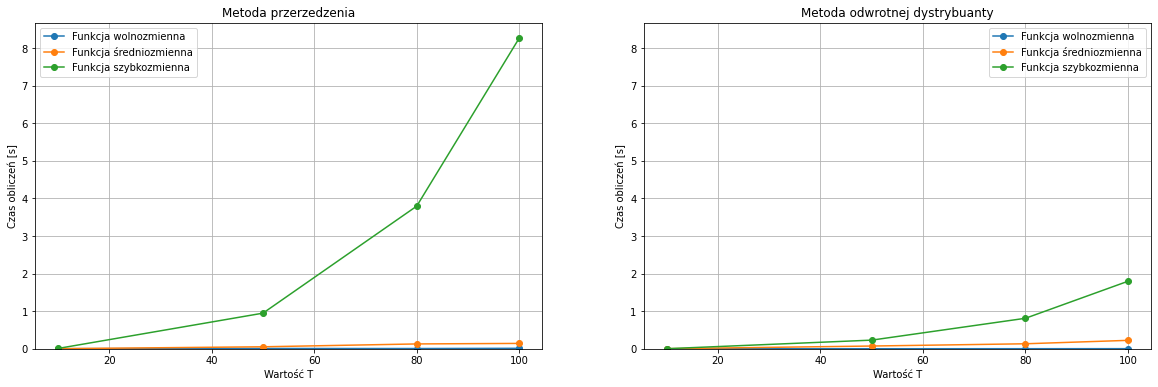

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].plot(T_values, czas_wolno_przerz, label='Funkcja wolnozmienna', marker='o')
axs[0].plot(T_values, czas_srednio_przerz, label='Funkcja średniozmienna', marker='o')
axs[0].plot(T_values, czas_szybko_przerz, label='Funkcja szybkozmienna', marker='o')
axs[0].set_title('Metoda przerzedzenia')
axs[0].set_xlabel('Wartość T')
axs[0].set_ylabel('Czas obliczeń [s]')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(T_values, czas_wolno_odwr, label='Funkcja wolnozmienna', marker='o')
axs[1].plot(T_values, czas_srednio_odwr, label='Funkcja średniozmienna', marker='o')
axs[1].plot(T_values, czas_szybko_odwr, label='Funkcja szybkozmienna', marker='o')
axs[1].set_title('Metoda odwrotnej dystrybuanty')
axs[1].set_xlabel('Wartość T')
axs[1].set_ylabel('Czas obliczeń [s]')
axs[1].legend()
axs[1].grid(True)

ylim = [0, max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])]
axs[0].set_ylim(ylim)
axs[1].set_ylim(ylim)

plt.show()


##### Efektywność
Efektywność mówi nam o średniej liczbie zdarzeń na jednostkę czasu.\
Niska efektywność oznacza, że musimy generować wiele zdarzeń, z których duża część jest odrzucana, co oznacza, że kod jest nieefektywny.

In [15]:
efekt_wolno_przerz, efekt_srednio_przerz, efekt_szybko_przerz = [], [], []
for T in T_values:
    efekt_wolno_przerz.append(efekt_wolno)
    efekt_srednio_przerz.append(efekt_srednio)
    efekt_szybko_przerz.append(efekt_szybko)



Kod zwraca trzy listy:
- 'efekt_wolno_przerz'
- 'efekt_srednio_przerz'
- 'efekt_szybko_przerz',\
które zawierają efektywności z metody przerzedzenia dla różnych wartości T i różnych intensywności procesu.
#### WYŚWIETLENIE WYNIKÓW

In [16]:
print("Efektywności dla metody przerzedzenia:")
for T, e_w, e_s, e_sz in zip(T_values, efekt_wolno_przerz, efekt_srednio_przerz, efekt_szybko_przerz):
    print(f"T: {T}, efektywność dla funkcji wolnozmiennej: {e_w}, średniozmiennej: {e_s}, szybkozmiennej: {e_sz}")


Efektywności dla metody przerzedzenia:
T: 10, efektywność dla funkcji wolnozmiennej: 7.176505140317686, średniozmiennej: 102.36894417891772, szybkozmiennej: 3334.9948825193655
T: 50, efektywność dla funkcji wolnozmiennej: 7.176505140317686, średniozmiennej: 102.36894417891772, szybkozmiennej: 3334.9948825193655
T: 80, efektywność dla funkcji wolnozmiennej: 7.176505140317686, średniozmiennej: 102.36894417891772, szybkozmiennej: 3334.9948825193655
T: 100, efektywność dla funkcji wolnozmiennej: 7.176505140317686, średniozmiennej: 102.36894417891772, szybkozmiennej: 3334.9948825193655


#### ZWIZUALIZOWANIE WYNIKÓW NA WYKRESACH

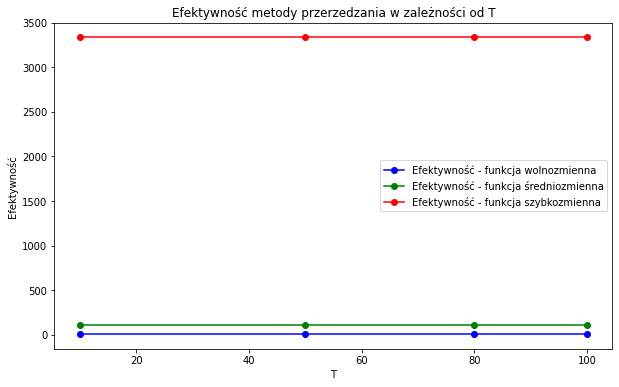

In [17]:

plt.figure(figsize=(10,6))

plt.plot(T_values, efekt_wolno_przerz, marker='o', linestyle='-', color='blue', label='Efektywność - funkcja wolnozmienna')
plt.plot(T_values, efekt_srednio_przerz, marker='o', linestyle='-', color='green', label='Efektywność - funkcja średniozmienna')
plt.plot(T_values, efekt_szybko_przerz, marker='o', linestyle='-', color='red', label='Efektywność - funkcja szybkozmienna')

plt.title('Efektywność metody przerzedzania w zależności od T')
plt.xlabel('T')
plt.ylabel('Efektywność')

plt.legend()

plt.show()


Jak widzimy na wykresie efektywność nie zależy od T, tylko od tego, szybkości zmienności funkcji lambda.
##### Procent zaakceptowanych punktów dla metody przerzedzania

In [18]:
print(f"Procent zaakceptowanych punktów dla funkcji wolnozmiennej: {stos_akceptacji_wolno * 100}%")
print(f"Procent zaakceptowanych punktów dla funkcji sredniozmiennej: {stos_akceptacji_srednio * 100}%")
print(f"Procent zaakceptowanych punktów dla funkcji szybkozmiennej: {stos_akceptacji_szybko * 100}%")



Procent zaakceptowanych punktów dla funkcji wolnozmiennej: 68.1214421252372%
Procent zaakceptowanych punktów dla funkcji sredniozmiennej: 50.925281066560544%
Procent zaakceptowanych punktów dla funkcji szybkozmiennej: 33.384218824294905%


Jak widzimy, im funkcja $\lambda$ szybciej zmienia się w czasie, tym więcększy $%$ punktów odrzucamy.

#### Wizualizacja wyników
##### Histogramy - osobno dla każdej funkcji $\lambda(t)$

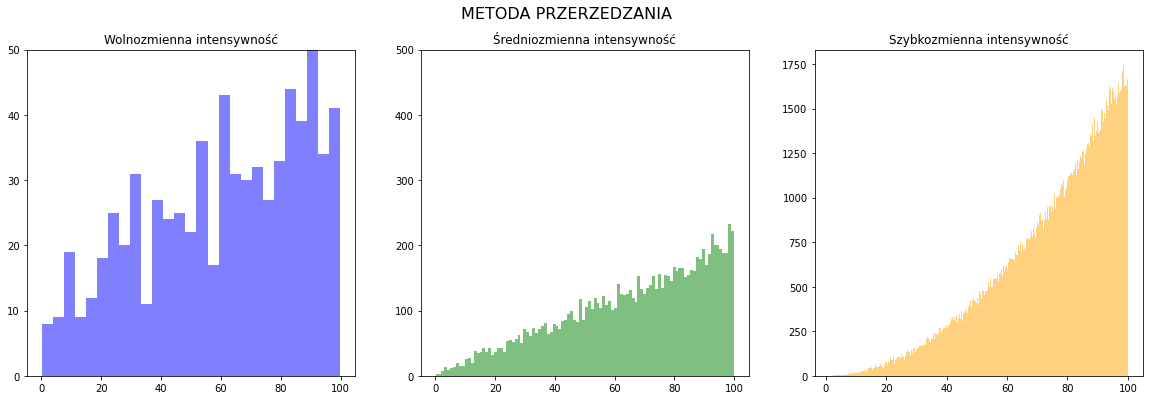

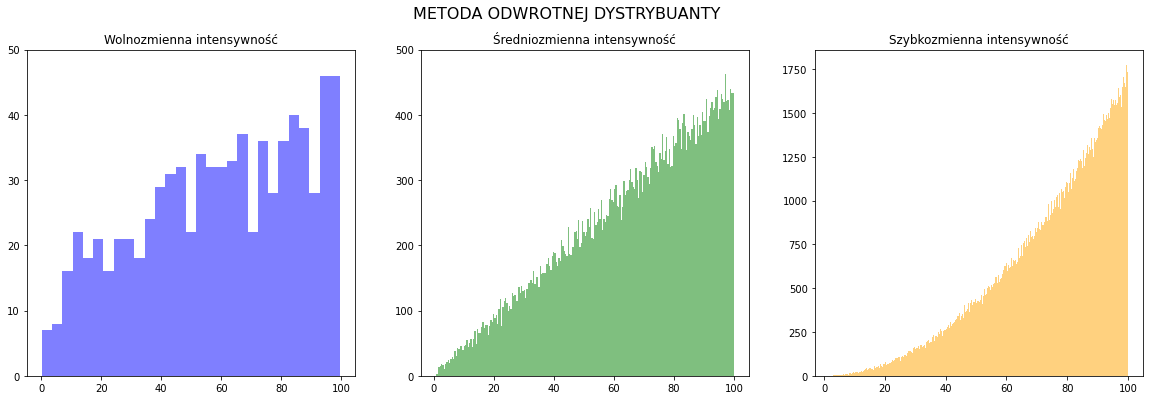

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].hist(S_wolno,color='blue', bins='sqrt',  alpha=0.5)
axs[0].set_title('Wolnozmienna intensywność')
axs[0].set_ylim(0,50)

axs[1].hist(S_srednio, bins='sqrt', color='green', alpha=0.5,)
axs[1].set_title('Średniozmienna intensywność')
axs[1].set_ylim(0,500)

axs[2].hist(S_szybko, bins='sqrt', color='orange', alpha=0.5,)
axs[2].set_title('Szybkozmienna intensywność')
fig.suptitle("METODA PRZERZEDZANIA", fontsize=16)
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].hist(wolno_odwr,color='blue', bins='sqrt',  alpha=0.5)
axs[0].set_title('Wolnozmienna intensywność')
axs[0].set_ylim(0,50)

axs[1].hist(srednio_odwr, bins='sqrt', color='green', alpha=0.5,)
axs[1].set_title('Średniozmienna intensywność')
axs[1].set_ylim(0,500)

axs[2].hist(szybko_odwr, bins='sqrt', color='orange', alpha=0.5,)
axs[2].set_title('Szybkozmienna intensywność')
fig.suptitle("METODA ODWROTNEJ DYSTRYBUANTY", fontsize=16)

plt.show()



#### Histogramy - na jednym wykresie

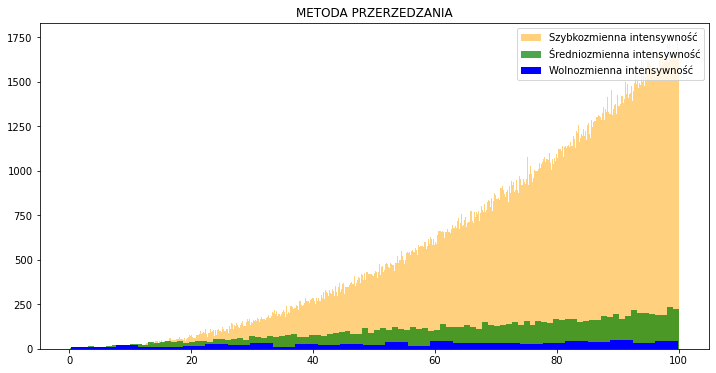

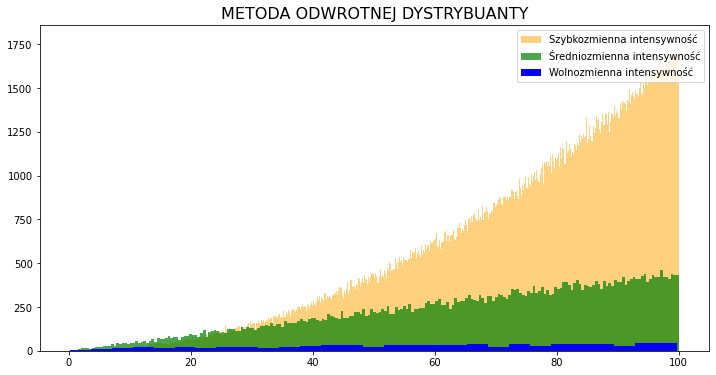

In [20]:
plt.figure(figsize=(12, 6))
plt.hist(S_szybko, bins='sqrt',color='orange', alpha=0.5, label='Szybkozmienna intensywność')
plt.hist(S_srednio, bins='sqrt', color='green', alpha=0.7, label='Średniozmienna intensywność')
plt.hist(S_wolno, bins='sqrt', color='blue',  alpha=1, label='Wolnozmienna intensywność')
plt.legend(loc='upper right')
plt.title("METODA PRZERZEDZANIA")
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(szybko_odwr, bins='sqrt',color='orange', alpha=0.5, label='Szybkozmienna intensywność')
plt.hist(srednio_odwr, bins='sqrt', color='green', alpha=0.7, label='Średniozmienna intensywność')
plt.hist(wolno_odwr, bins='sqrt', color='blue',  alpha=1, label='Wolnozmienna intensywność')
plt.legend(loc='upper right')
plt.title("METODA ODWROTNEJ DYSTRYBUANTY", fontsize=16)
plt.show()




#### Wykresy schodkowe
Dla każdego zdarzenia wartość na osi $OY$ zwiększa się o 1

Obliczenie wartości y:

In [21]:
#przerzedzanie:
y_wolno = np.arange(len(S_wolno))
y_srednio=np.arange(len(S_srednio))
y_szybko = np.arange(len(S_szybko))

S_wolno = np.insert(S_wolno, 0, 0)
S_srednio = np.insert(S_srednio, 0, 0)
S_szybko = np.insert(S_szybko, 0, 0)
y_wolno = np.insert(y_wolno, 0, 0)
y_srednio = np.insert(y_srednio, 0, 0)
y_szybko = np.insert(y_szybko, 0, 0)
#odwrotna dystrybuanta
y1 = np.arange(len(wolno_odwr))
y2 = np.arange(len(srednio_odwr))
y3 = np.arange(len(szybko_odwr))

NPP1 = np.insert(wolno_odwr, 0, 0)
NPP2 = np.insert(srednio_odwr, 0, 0)
NPP3 = np.insert(szybko_odwr, 0, 0)

y1 = np.insert(y1, 0, 0)
y2 = np.insert(y2, 0, 0)
y3 = np.insert(y3, 0, 0)

Generowanie wykresów:

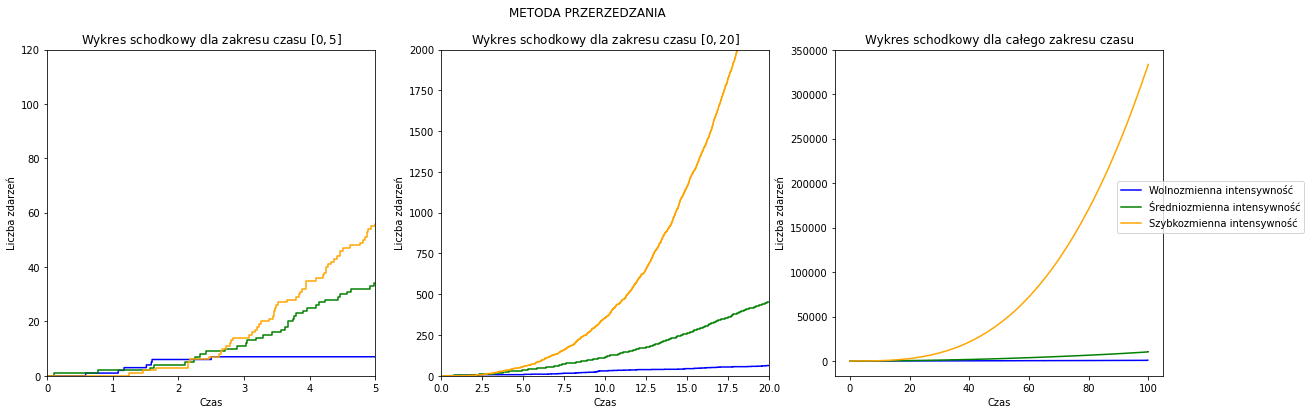

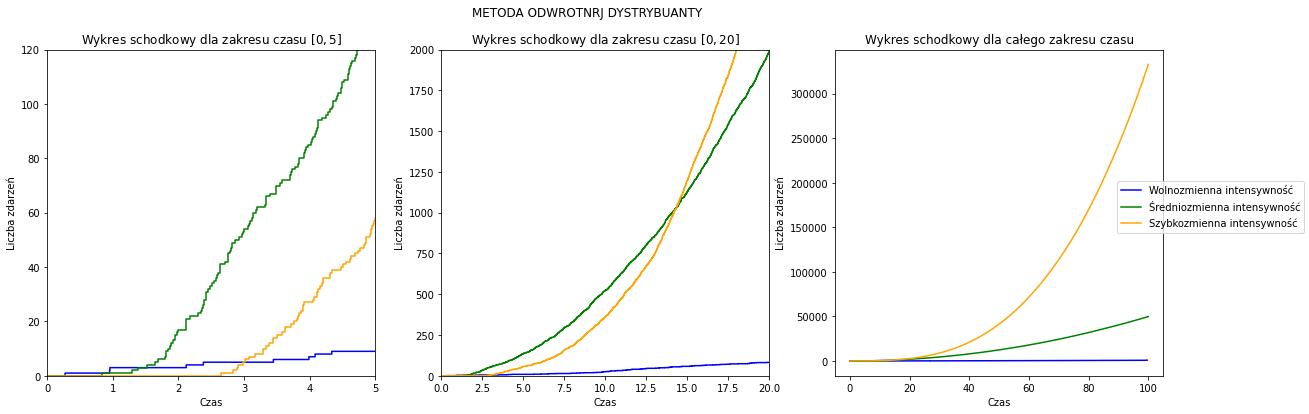

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].step(S_wolno, y_wolno, label='Wolnozmienna intensywność', color='blue', where='post')
axs[0].step(S_srednio, y_srednio, label='Średniozmienna intensywność', color='green', where='post')
axs[0].step(S_szybko, y_szybko, label='Szybkozmienna intensywność', color='orange', where='post')
axs[0].set_xlabel('Czas')
axs[0].set_ylabel('Liczba zdarzeń')
axs[0].set_title('Wykres schodkowy dla zakresu czasu $[0, 5]$')
axs[0].set_xlim(0, 5)
axs[0].set_ylim(0, 120)

axs[1].step(S_wolno, y_wolno, color='blue', where='post')
axs[1].step(S_srednio, y_srednio,color='green', where='post')
axs[1].step(S_szybko, y_szybko,color='orange', where='post')
axs[1].set_title('Wykres schodkowy dla zakresu czasu $[0,20]$')
axs[1].set_xlabel('Czas')
axs[1].set_ylabel('Liczba zdarzeń')
axs[1].set_xlim(0, 20)
axs[1].set_ylim(0, 2000)

axs[2].step(S_wolno, y_wolno, color='blue', where='post')
axs[2].step(S_srednio, y_srednio,color='green', where='post')
axs[2].step(S_szybko, y_szybko,color='orange', where='post')
axs[2].set_title('Wykres schodkowy dla całego zakresu czasu')
axs[2].set_xlabel('Czas')
axs[2].set_ylabel('Liczba zdarzeń')
fig.legend(loc='center right')
fig.suptitle('METODA PRZERZEDZANIA')

plt.show()




fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].step(NPP1, y1, label='Wolnozmienna intensywność', color='blue', where='post')
axs[0].step(NPP2, y2, label='Średniozmienna intensywność', color='green', where='post')
axs[0].step(NPP3, y3, label='Szybkozmienna intensywność', color='orange', where='post')
axs[0].set_xlabel('Czas')
axs[0].set_ylabel('Liczba zdarzeń')
axs[0].set_title('Wykres schodkowy dla zakresu czasu $[0, 5]$')
axs[0].set_xlim(0, 5)
axs[0].set_ylim(0, 120)


axs[1].step(NPP1, y1, color='blue', where='post')
axs[1].step(NPP2, y2, color='green', where='post')
axs[1].step(NPP3, y3, color='orange', where='post')

axs[1].set_title('Wykres schodkowy dla zakresu czasu $[0,20]$')
axs[1].set_xlabel('Czas')
axs[1].set_ylabel('Liczba zdarzeń')
axs[1].set_xlim(0, 20)
axs[1].set_ylim(0, 2000)

axs[2].step(NPP1, y1, color='blue', where='post')
axs[2].step(NPP2, y2, color='green', where='post')
axs[2].step(NPP3, y3, color='orange', where='post')

axs[2].set_title('Wykres schodkowy dla całego zakresu czasu')
axs[2].set_xlabel('Czas')
axs[2].set_ylabel('Liczba zdarzeń')

fig.legend(loc='center right')
fig.suptitle('METODA ODWROTNRJ DYSTRYBUANTY')
plt.show()


# **Zadanie 3 - Estymacja niejednorodnej intensywności**

# **Zadanie 4 - Prawdopodobieństwo ruiny**

W tym zadaniu zajmiemy się pewną odmiana zadania 3 z listy 10- wówczas interesowało nas sprawdzanie niewypłacalności w konkretnych momentach, natomiast teraz chcemy sprawdzić wypłacalność w każdym momencie (tzn. sprawdzić, czy w każdym momencie nasz kapitał jest liczbą dodatnią).

In [23]:
def gen_proces_ryzyka(kapital, lambada, przychod, czas):
    value = np.zeros(czas)
    value[0] = kapital
    
    for i in range(1, czas):
        szkoda = np.random.exponential(lambada)
        przychod = np.random.normal(0.5, 1)
        value[i] = value[i-1] + przychod - szkoda
        
    return value

def prawdopodobienstwo_ruiny(kapital, lambada, przychod, czas, amount):
    prawdopodobienstwo_ruiny = np.zeros(czas)
    
    for _ in range(amount):
        proces_ryzyka = gen_proces_ryzyka(kapital, lambada, przychod, czas)
        
        for i in range(czas):
            if proces_ryzyka[i] < 0:
                prawdopodobienstwo_ruiny[i] += 1
    
    prawdopodobienstwo_ruiny /= amount
    
    return prawdopodobienstwo_ruiny

Funkcja proces_ryzyka zwraca nam liste, która reprezentuje nasz kapitał w kolejnych czasach, natomiast funkcja prawdopodobienstwo_ruiny sprawdza dla wskazanej ilosci symulacji, czy w którymkolwiek momencie pojedynczego procesu nasz kapitał spada poniżej 0. Teraz przedstawimy zależność prawdopodobieństwa ruiny od czasu dla 1000 symulacji Monte Carlo oraz 20 przykładowych trajektorii.

In [24]:
kapital = 5  # Kapitał początkowy
lambada = 1  # Intensywność procesu szkód (rozkład wykładniczy Exp(1))
przychod = 1/2  # Dryft (przychody) procesu
czas = 100 # Czasy, w których będziemy obliczać prawdopodobieństwo niewypłacalności
amount = 100000  # Liczba symulacji Monte Carlo

prawdopodobienstwo_ruiny = prawdopodobienstwo_ruiny(kapital, lambada, przychod, czas, amount)

czas_wykres_1 = np.arange(1, czas+1)
plt.plot(czas_wykres_1, prawdopodobienstwo_ruiny)
plt.xlabel('Czas')
plt.ylabel('Prawdopodobieństwo ruiny')
plt.title('Prawdopodobieństwo ruiny w zależności od czasu')
plt.show()

amount_trajektorie=20

trajektorie = np.zeros((amount_trajektorie+1, czas))
for j in range(amount_trajektorie): 
    trajektorie[j] = gen_proces_ryzyka(kapital, lambada, przychod, czas)

czas_wykres_2 = np.arange(czas)
plt.plot(czas_wykres_2, trajektorie.T)
plt.xlabel('Czas')
plt.ylabel('Kapitał')
plt.title('Trajektoria procesu ryzyka')
plt.show()

KeyboardInterrupt: 

Jak widzimy, dla przyjętych wyżej wartości (wartości były brane z zad 3 z listy 10) z prawdopodobieństem równym niemal 1 osiągamy ruine. 

# **Zadanie 5 - Rozkład stacjonarny łańcucha Markowa**
#### $\textbf{DEFINICJA}$
- Proces Markowa – ciąg zdarzeń, w którym prawdopodobieństwo każdego zdarzenia zależy jedynie od wyniku poprzedniego. W ujęciu matematycznym, procesy Markowa to takie procesy stochastyczne, które spełniają własność Markowa.
- Własność Markowa - własność procesów stochastycznych polegająca na tym, że warunkowe rozkłady prawdopodobieństwa przyszłych stanów procesu są zdeterminowane wyłącznie przez jego bieżący stan, bez względu na przeszłość.
   -  Dla procesów z czasem ciągłym:\
$ \forall h>0\quad \mathrm {Pr} {\big [}X(t+h)\leqslant y\,|\forall s\leqslant t\,\ X(s)=x(s){\big ]}=\mathrm {Pr} {\big [}X(t+h)\leqslant y\,|\,X(t)=x(t){\big ]}$
   - Dla procesów z czasem dyskretnym:\
${P(X_{n+1}\leqslant y|X_{0},X_{1},X_{2},\dots ,X_{n})=P(X_{n+1}\leqslant y|X_{n}).}$
- Łańcuchy Markowa -  procesy Markowa z czasem dyskretnym.

### Zaimportowanie potrzebnych bibliotek

In [25]:
import numpy as np
import matplotlib.pyplot as plt

### Zdefiniowanie łańcucha Markowa

In [26]:
P = np.array([[0.5, 0.5, 0], [0, 0.5, 0.5], [0.5, 0, 0.5]])

liczba_krokow = 100

X_n = np.random.choice([1, 2, 3])

trajektoria = [X_n]

for _ in range(liczba_krokow):
    X_n = np.random.choice([1, 2, 3], p=P[X_n-1])
    trajektoria.append(X_n)

print('Początkowe 20 stanów łańcucha Markowa',trajektoria[:20])

Początkowe 20 stanów łańcucha Markowa [1, 1, 2, 2, 3, 1, 2, 2, 3, 1, 2, 3, 3, 3, 1, 2, 3, 3, 1, 2]


W kodzie:
- Definiujemy macierz prawdopodobieństw przejścia P dla łańcucha Markowa.
- Ustalamy liczbę kroków symulacji ('liczba_krokow').
- Wybieramy losowo początkowy stan $X_n$ z zestawu {1, 2, 3}.
- Tworzymy listę 'trajektoria' i dodajemy do niej początkowy stan.
- Przez określoną liczbę kroków, wybieramy następny stan $X_n$ zgodnie z prawdopodobieństwami przejścia zdefiniowanymi w macierzy P, a następnie dodajemy ten stan do listy trajektoria.
- Wyświetlamy pierwsze 20 stanów łańcucha Markowa.
Kod zwraca listę 'trajektoria', która jest sekwencją stanów wygenerowanych przez łańcuch Markowa.
### Wizualizacja wyników
#### Wykres trajektorii

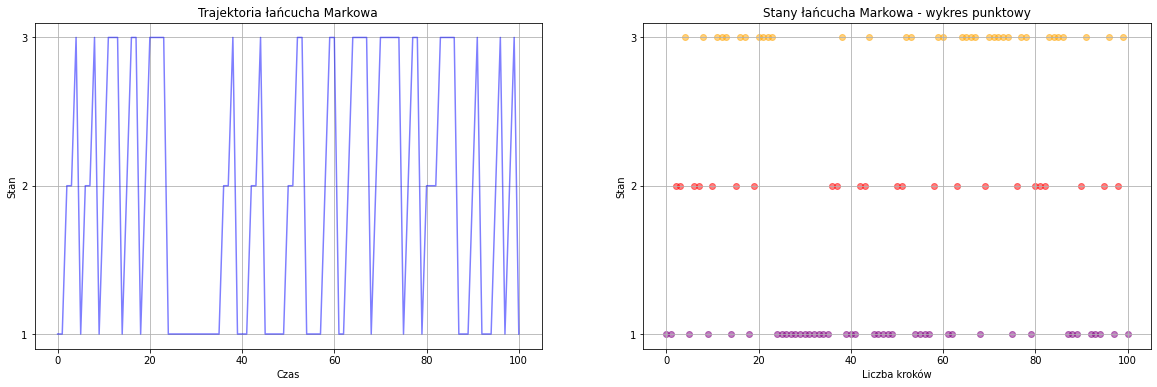

In [27]:
colors = {1: 'purple', 2: 'red', 3: 'orange'}


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.plot(trajektoria, color='blue', alpha=0.5)
ax1.set_title('Trajektoria łańcucha Markowa')
ax1.set_yticks([1, 2, 3])
ax1.grid(True)
ax1.set_xlabel('Czas')
ax1.set_ylabel('Stan')

for i in range(len(trajektoria)):
    ax2.scatter(i, trajektoria[i], color=colors[trajektoria[i]], alpha=0.5)
ax2.set_title('Stany łańcucha Markowa - wykres punktowy')
ax2.set_yticks([1, 2, 3])
ax2.grid(True)
ax2.set_xlabel('Liczba kroków')
ax2.set_ylabel('Stan')

plt.show()

#### Histogramy dla różnych wartości liczby kroków

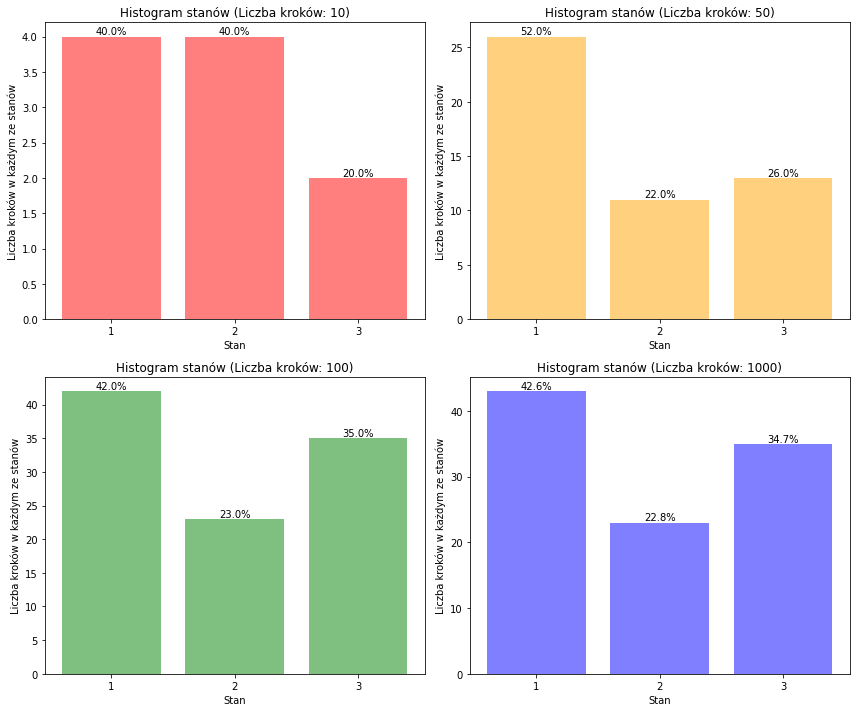

In [28]:
liczby_krokow=[10,50,100,1000]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

kolory = ['red', 'orange', 'green', 'blue']

for i, liczba_krokow in enumerate(liczby_krokow):
    trajektoria_podzbior = trajektoria[:liczba_krokow]

    row = i // 2
    col = i % 2

    liczebności, przedziały, słupki = axs[row, col].hist(trajektoria_podzbior, bins=[1, 2, 3, 4], align='left', alpha=0.5, rwidth=0.8, color=kolory[i])

    suma_liczebności = sum(liczebności)

    for liczebność, słupek in zip(liczebności, słupki):
        procent = liczebność / suma_liczebności * 100
        wysokość = słupek.get_height()
        axs[row, col].text(słupek.get_x() + słupek.get_width() / 2, wysokość, f'{procent:.1f}%', ha='center', va='bottom')

    axs[row, col].set_title(f'Histogram stanów (Liczba kroków: {liczba_krokow})')
    axs[row, col].set_xlabel('Stan')
    axs[row, col].set_ylabel('Liczba kroków w każdym ze stanów')
    axs[row, col].set_xticks([1, 2, 3])

plt.tight_layout()
plt.show()

#### $\textbf{Stan stacjonarny}$
Rozkład prawdopodobieństw na przestrzeni stanów $ \mathbf {S} $ nazywany jest stacjonarnym wtedy i tylko wtedy, gdy spełniony jest warunek:\
${\pi _{j}=\sum _{i\in S}\pi _{i}p_{ij},}$\
czyli:\
${\pi \mathbf {P} =\pi ,}$
gdzie $\pi$  jest takim wektorem wierszowym, że:\
${\sum _{i}\pi _{i}=1\quad \forall \pi _{i}\geqslant 0.}$\
Jeśli rozkład początkowy $\mathbf {x_{0}}$  jest stacjonarny, to każdy kolejny rozkład $\mathbf {x_{n}}$  również jest stacjonarny.\
Może nie istnieć żaden, istnieć jeden lub więcej niż jeden rozkład stacjonarny dla danego procesu.

Obliczenie i wyświetlenie stanu stacjonarnego:


In [29]:
wart_wlasne, wektory = np.linalg.eig(P.T)
indeks_dla_1 = np.argmin(np.abs(wart_wlasne - 1))
st_st = np.real(wektory[:, indeks_dla_1])
st_st /= st_st.sum()

print('Stan stacjonarny:', st_st)


Stan stacjonarny: [0.33333333 0.33333333 0.33333333]


W tym kodzie obliczamy stan stacjonarny dla łańcucha Markowa:
- Obliczamy wartości własne i wektory własne dla macierzy prawdopodobieństw przejścia P przy użyciu 'np.linalg.eig()'.
- Znajdujemy indeks wartości własnej, która jest najbliższa 1 przy użyciu 'np.argmin(np.abs(wart_wlasne - 1))'.
- Wybieramy wektor własny odpowiadający wartości własnej 1 i normalizujemy go do sumy 1.
Kod zwraca wektor stacjonarny 'st_st' reprezentujący prawdopodobieństwa stacjonarne dla poszczególnych stanów.
#### Wygenerowanie histogramu stanów z zaznaczonym stanem stacjonarnym

Histogram:  [0.42574257 0.22772277 0.34653465]
Stan stacjonarny:  [0.33333333 0.33333333 0.33333333]


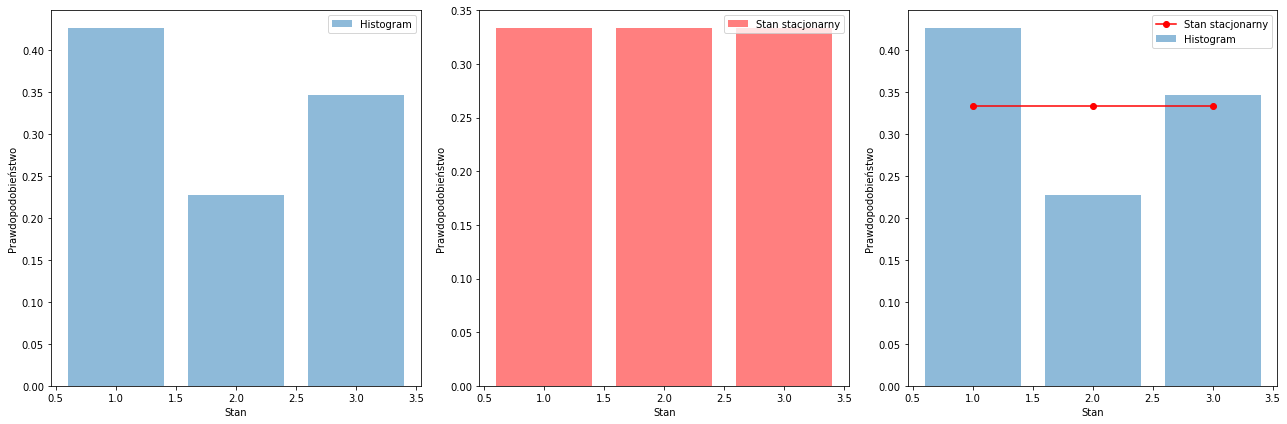

In [30]:
# Obliczanie histogramu
histogram, _ = np.histogram(trajektoria, bins=[1, 2, 3, 4], density=True)

# Porównanie histogramu i stanu stacjonarnego
print("Histogram: ", histogram)
print("Stan stacjonarny: ", st_st)

# Tworzenie subplotów
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Wykres 1: Histogram danych
axs[0].bar([1, 2, 3], histogram, alpha=0.5, label='Histogram')
axs[0].set_xlabel('Stan')
axs[0].set_ylabel('Prawdopodobieństwo')
axs[0].legend()

# Wykres 2: Histogram stanu stacjonarnego
axs[1].bar([1, 2, 3], st_st, alpha=0.5, label='Stan stacjonarny', color='red')
axs[1].set_xlabel('Stan')
axs[1].set_ylabel('Prawdopodobieństwo')
axs[1].legend()

# Wykres 3: Histogram z zaznaczonym stanem stacjonarnym
axs[2].bar([1, 2, 3], histogram, alpha=0.5, label='Histogram')
axs[2].plot([1, 2, 3], st_st, 'ro-', label='Stan stacjonarny')
axs[2].set_xlabel('Stan')
axs[2].set_ylabel('Prawdopodobieństwo')
axs[2].legend()

# Wyświetlanie wykresów
plt.tight_layout()
plt.show()


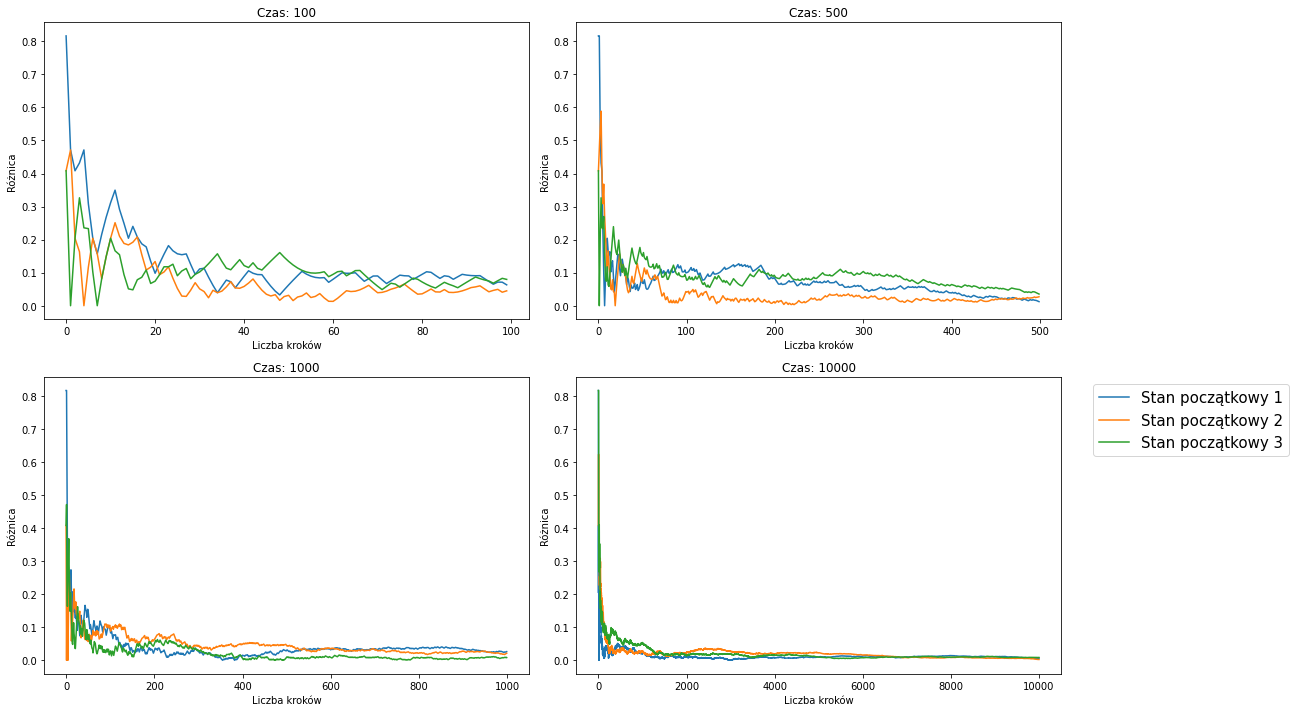

In [31]:
l_krokow = 10000
stany = np.arange(1, 4) #podajemy wartość do 4, ponieważ prawa strona jest zbiorem otwartym

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

for i, kroki in enumerate([100, 500, 1000, l_krokow]):
    for stan_poczatkowy in stany:
        stan = stan_poczatkowy
        trajektoria = [stan]
        rozbieznosci = []
        for _ in range(kroki):
            stan = np.random.choice(stany, p=P[stan-1])
            trajektoria.append(stan)

            #empiryczny rozkład stanów i porównanie go z teoretycznym rozkładem stacjonarnym
            st_st_empiryczny = np.bincount(np.array(trajektoria), minlength=len(stany)+1)[1:] / len(trajektoria)
            rozbieznosc = np.linalg.norm(st_st_empiryczny - st_st)
            rozbieznosci.append(rozbieznosc)

        # Wykreśl tempo zbieżności
        axes[i].plot(np.arange(kroki), rozbieznosci, label=f'Stan początkowy {stan_poczatkowy}')
        axes[i].set_title(f'Czas: {kroki}')
        axes[i].set_xlabel('Liczba kroków')
        axes[i].set_ylabel('Różnica')

fig.subplots_adjust(right=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
plt.tight_layout()
plt.show()


Jak widzimy, różnice między stanem stacjonarnym dla każdego ze stanów początkowych dążą do 0. Pokazane zostały wykresy dla różnej liczby kroków, aby dokładniej można było oszacować czas, dla którego łańcuch osiąga stan stacjonarny. 

Kod zwraca wykresy pokazujące rozbieżność między empirycznym rozkładem stanów, a rozkładem stacjonarnym w zależności od liczby kroków dla różnych stanów początkowych.

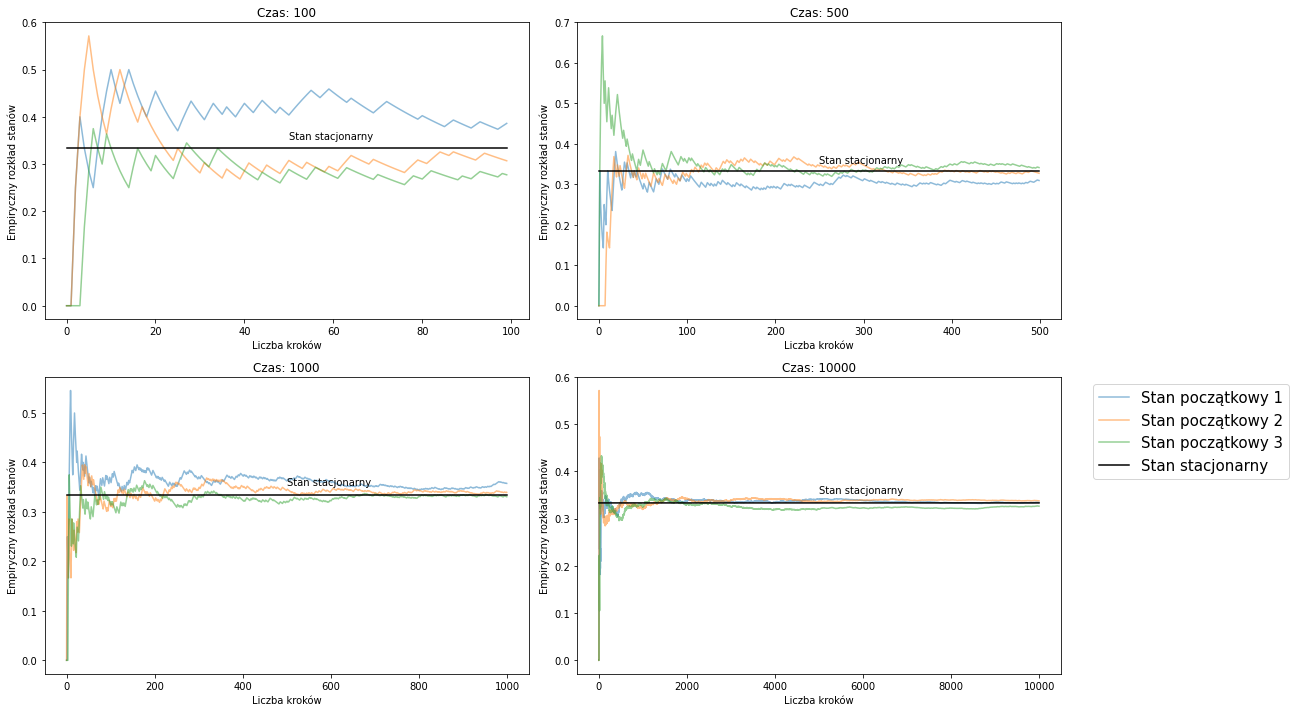

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()


for i, kroki in enumerate([100, 500, 1000, l_krokow]):
    for j, stan_poczatkowy in enumerate(stany):
        stan = stan_poczatkowy
        trajektoria = [stan]
        st_st_empiryczne = []
        for _ in range(kroki):
            stan = np.random.choice(stany, p=P[stan-1])
            trajektoria.append(stan)

            # empiryczny rozkład stanów
            st_st_empiryczny = np.bincount(np.array(trajektoria), minlength=len(stany)+1)[1:] / len(trajektoria)
            st_st_empiryczne.append(st_st_empiryczny[j-1]) 

        # Wykreśl tempo zbieżności
        axes[i].plot(np.arange(kroki), st_st_empiryczne, label=f'Stan początkowy {stan_poczatkowy}', alpha=0.5)
    axes[i].plot(np.arange(kroki), [st_st[j-1]]*kroki, label='Stan stacjonarny', color='black')
    axes[i].text(kroki*0.5, st_st[j-1]+0.02, 'Stan stacjonarny') 
    axes[i].set_title(f'Czas: {kroki}')
    axes[i].set_xlabel('Liczba kroków')
    axes[i].set_ylabel('Empiryczny rozkład stanów')

fig.subplots_adjust(right=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
plt.tight_layout()
plt.show()


Kod generuje wykresy ilustrujące, jak rozkład prawdopodobieństwa stanów łańcucha Markowa zmienia się w czasie, zaczynając od różnych stanów początkowych. Pokazuje, jak rozkład zbiega do rozkładu stacjonarnego.

# **Zadanie 6 - Czas wyjścia**